In [1]:
import pandas as pd
import numpy as np
import MDAnalysis as mda
mda.warnings.showwarning

<function warnings.showwarning(message, category, filename, lineno, file=None, line=None)>

In [2]:
# DEFINING PATHS FOR ALL FILES

# WT AMBER
pwam_top = r"C:\Users\vaibh\Documents\Analysis\data\WT_Amber\md_1000ns.tpr"
pwam_traj = r"C:\Users\vaibh\Documents\Analysis\data\WT_Amber\md_1000ns_fit.xtc"

# WT CHARMM
pwch_top = r"C:\Users\vaibh\Documents\Analysis\data\WT_Charmm\md_1000ns.tpr"
pwch_traj = r"C:\Users\vaibh\Documents\Analysis\data\WT_Charmm\md_1000ns_fit.xtc"

# WT OPLS
pwop_top = r"C:\Users\vaibh\Documents\Analysis\data\WT_OPLS\md_1000ns.tpr"
pwop_traj = r"C:\Users\vaibh\Documents\Analysis\data\WT_OPLS\md_1000ns_fit.xtc"

# WT C36m
pwc36_top = r"C:\Users\vaibh\Documents\Analysis\data\WT_C36m\md_1000ns.tpr"
pwc36_traj = r"C:\Users\vaibh\Documents\Analysis\data\WT_C36m\md_1000ns_fit.xtc"

# MT AMBER
pmam_top = r"C:\Users\vaibh\Documents\Analysis\data\MT_Amber\md_1000ns.tpr"
pmam_traj = r"C:\Users\vaibh\Documents\Analysis\data\MT_Amber\md_1000ns_fit.xtc"

# MT CHARMM
pmch_top = r"C:\Users\vaibh\Documents\Analysis\data\MT_Charmm\md_1000ns.tpr"
pmch_traj = r"C:\Users\vaibh\Documents\Analysis\data\MT_Charmm\md_1000ns_fit.xtc"

# MT OPLS
pmop_top = r"C:\Users\vaibh\Documents\Analysis\data\MT_OPLS\md_1000ns.tpr"
pmop_traj = r"C:\Users\vaibh\Documents\Analysis\data\MT_OPLS\md_1000ns_fit.xtc"

# MT C36m
pmc36_top = r"C:\Users\vaibh\Documents\Analysis\data\MT_C36m\md_1000ns.tpr"
pmc36_traj = r"C:\Users\vaibh\Documents\Analysis\data\MT_C36m\md_1000ns_fit.xtc"

In [3]:
wam = mda.Universe(pwam_top, pwam_traj)
wch = mda.Universe(pwch_top, pwch_traj)
wop = mda.Universe(pwop_top, pwop_traj)
wc36 = mda.Universe(pwc36_top, pwc36_traj)
mam = mda.Universe(pmam_top, pmam_traj)
mch = mda.Universe(pmch_top, pmch_traj)
mop = mda.Universe(pmop_top, pmop_traj)
mc36 = mda.Universe(pmc36_top, pmc36_traj)

In [4]:
# Importing rms for calculating RMSD
from MDAnalysis.analysis import rms
import warnings
# suppress some MDAnalysis warnings when writing PDB files
warnings.filterwarnings('ignore')

In [5]:
# DEFINING GROUP SELECTIONS
ff = ['wam', 'wch', 'wop', 'wc36', 'mam', 'mch', 'mop', 'mc36']
uni = [wam, wch, wop, wc36, mam, mch, mop, mc36]

grpselections = ['name CA', 
                 f'(resnum {162-161}:{172-161} or resnum {177-161}:{187-161} or resnum {192-161}:{197-161}) and name CA',
                 f'(resnum {162-161}:{172-161}) and name CA',
                 f'(resnum {177-161}:{187-161}) and name CA',
                 f'(resnum {192-161}:{197-161}) and name CA']
    

In [6]:
rmsd = []
for x, u in zip(ff, uni):
    tmp = 'R_' + x
    tmp = rms.RMSD(u, u, select='name CA', groupselections=grpselections, ref_frame=0)
    tmp.run()
    rmsd.append(tmp)
    del tmp

In [7]:
for x, r in zip(ff, rmsd):
    globals()[f'df_{x}'] = pd.DataFrame(r.results.rmsd, 
                                        columns=['Frame', 'Time (ns)', f'cs_{x}', f'cp_{x}', f'ch_{x}', 
                                                 f'ch1_{x}', f'ch2_{x}', f'ch3_{x}']) ## cs - calpha-system, cp - calpha-protein
    

In [8]:
# SETTING 'TIME' AS INDEX FOR ALL DATAFRAMES
for x in ff:
    globals()[f'df_{x}'].set_index('Time (ns)', inplace=True)

In [9]:
df_wam.shape

(100001, 7)

In [10]:
df_wam.head()

,Frame,cs_wam,cp_wam,ch_wam,ch1_wam,ch2_wam,ch3_wam
Time (ns),,,,,,,
0.0,0.0,2.611745e-07,0.000000,0.000000,0.000000,0.000000,0.000000
10.0,1.0,7.328940e-01,0.732894,0.710115,0.814199,0.530807,0.788239
20.0,2.0,1.005356e+00,1.005356,0.849489,1.154295,0.592047,0.531293
30.0,3.0,7.720574e-01,0.772057,0.712804,0.874979,0.680315,0.344945
40.0,4.0,8.676834e-01,0.867683,0.758650,0.866633,0.775873,0.453146


In [11]:
## DROPIING 'FRAME COLUMN'
for x in ff:
    globals()[f'df_{x}'].drop(columns=['Frame'], inplace=True)


In [12]:
df_wt = pd.concat([df_wam, df_wch, df_wop, df_wc36], axis=1)
df_mt = pd.concat([df_mam, df_mch, df_mop, df_mc36], axis=1)

In [13]:
# Saving Dataframes to exel files
df_wt.to_excel("rmsd_wt.xlsx", index=True)
df_mt.to_excel("rmsd_mt.xlsx", index=True)

In [14]:
# CREATING PLOTS
import matplotlib.pyplot as plt
import seaborn as sns

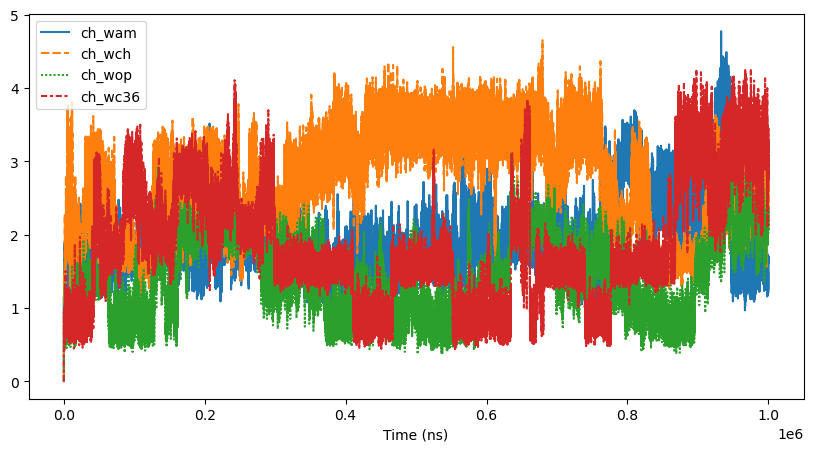

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_wt[['ch_wam', 'ch_wch', 'ch_wop', 'ch_wc36']])
plt.show()

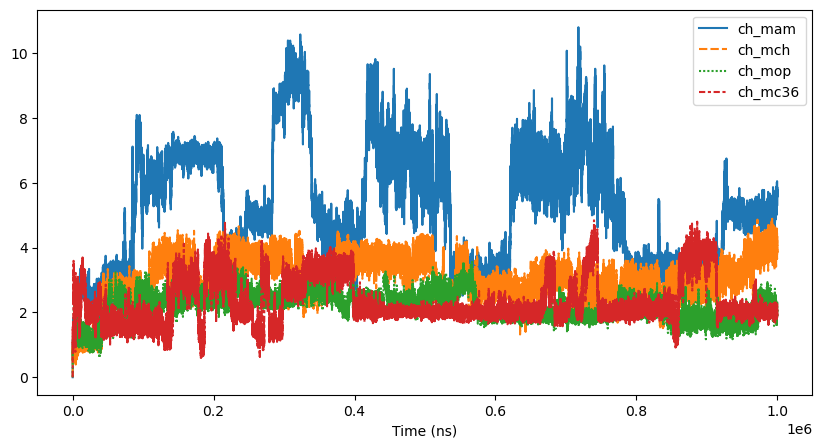

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_mt[['ch_mam', 'ch_mch', 'ch_mop', 'ch_mc36']])
plt.show()

In [17]:
# Need to generate Dataframes with running average values
window_size = 100
df_wt_avg = df_wt.rolling(window=window_size).mean()
df_wt_avg.dropna(inplace=True)
# Saving Dataframes to exel files
df_wt_avg.to_excel("rmsd_wtAvg.xlsx", index=True)
df_wt_avg.shape
# df_wt_avg.head()

(99902, 24)

In [18]:
# Need to generate Dataframes with running average values
window_size = 100
df_mt_avg = df_mt.rolling(window=window_size).mean()
df_mt_avg.dropna(inplace=True)
df_mt_avg.to_excel("rmsd_mtAvg.xlsx", index=True)
df_mt_avg.shape
# df_wt_avg.head()

(99902, 24)

In [19]:
df_wt_avg = pd.read_excel('rmsd_wtAvg.xlsx')
df_mt_avg = pd.read_excel('rmsd_mtAvg.xlsx')

In [20]:
df_wt = pd.read_excel('rmsd_wt.xlsx')
df_mt = pd.read_excel('rmsd_mt.xlsx')

In [21]:
df_wt.head()

,Time (ns),cs_wam,cp_wam,ch_wam,ch1_wam,ch2_wam,ch3_wam,cs_wch,cp_wch,ch_wch,...,ch_wop,ch1_wop,ch2_wop,ch3_wop,cs_wc36,cp_wc36,ch_wc36,ch1_wc36,ch2_wc36,ch3_wc36
0,0,2.611745e-07,0.000000,0.000000,0.000000,0.000000,0.000000,3.015783e-07,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10,7.328940e-01,0.732894,0.710115,0.814199,0.530807,0.788239,4.737346e-01,0.473735,0.474090,...,0.497763,0.609726,0.412842,0.402753,0.572677,0.572677,0.536089,0.690570,0.375758,0.456087
2,20,1.005356e+00,1.005356,0.849489,1.154295,0.592047,0.531293,6.327571e-01,0.632757,0.555731,...,0.506291,0.437389,0.557852,0.524351,0.627111,0.627111,0.575182,0.664484,0.440504,0.615351
3,30,7.720574e-01,0.772057,0.712804,0.874979,0.680315,0.344945,7.543627e-01,0.754363,0.726061,...,0.610992,0.406897,0.589519,0.895231,0.485684,0.485684,0.433794,0.384552,0.401629,0.557962
4,40,8.676834e-01,0.867683,0.758650,0.866633,0.775873,0.453146,6.611558e-01,0.661156,0.707045,...,0.488986,0.555565,0.418062,0.479114,0.624852,0.624852,0.655331,0.723238,0.651265,0.517273


In [22]:
df_wt.set_index('Time (ns)', inplace=True)
df_mt.set_index('Time (ns)', inplace=True)

df_wt = df_wt.rename_axis('Time (ps)')
df_mt = df_mt.rename_axis('Time (ps)')

df_wt.head()

,cs_wam,cp_wam,ch_wam,ch1_wam,ch2_wam,ch3_wam,cs_wch,cp_wch,ch_wch,ch1_wch,...,ch_wop,ch1_wop,ch2_wop,ch3_wop,cs_wc36,cp_wc36,ch_wc36,ch1_wc36,ch2_wc36,ch3_wc36
Time (ps),,,,,,,,,,,,,,,,,,,,,
0,2.611745e-07,0.000000,0.000000,0.000000,0.000000,0.000000,3.015783e-07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,7.328940e-01,0.732894,0.710115,0.814199,0.530807,0.788239,4.737346e-01,0.473735,0.474090,0.537362,...,0.497763,0.609726,0.412842,0.402753,0.572677,0.572677,0.536089,0.690570,0.375758,0.456087
20,1.005356e+00,1.005356,0.849489,1.154295,0.592047,0.531293,6.327571e-01,0.632757,0.555731,0.749084,...,0.506291,0.437389,0.557852,0.524351,0.627111,0.627111,0.575182,0.664484,0.440504,0.615351
30,7.720574e-01,0.772057,0.712804,0.874979,0.680315,0.344945,7.543627e-01,0.754363,0.726061,0.887832,...,0.610992,0.406897,0.589519,0.895231,0.485684,0.485684,0.433794,0.384552,0.401629,0.557962
40,8.676834e-01,0.867683,0.758650,0.866633,0.775873,0.453146,6.611558e-01,0.661156,0.707045,0.970002,...,0.488986,0.555565,0.418062,0.479114,0.624852,0.624852,0.655331,0.723238,0.651265,0.517273


In [23]:
df_wt_avg.set_index('Time (ns)', inplace=True)
df_mt_avg.set_index('Time (ns)', inplace=True)

df_wt_avg.head()

,cs_wam,cp_wam,ch_wam,ch1_wam,ch2_wam,ch3_wam,cs_wch,cp_wch,ch_wch,ch1_wch,...,ch_wop,ch1_wop,ch2_wop,ch3_wop,cs_wc36,cp_wc36,ch_wc36,ch1_wc36,ch2_wc36,ch3_wc36
Time (ns),,,,,,,,,,,,,,,,,,,,,
990,1.424060,1.424060,1.288872,1.643151,0.859701,1.170236,0.842658,0.842658,0.783156,1.034610,...,0.683319,0.885011,0.472099,0.523224,0.720366,0.720366,0.708311,0.819068,0.637325,0.559662
1000,1.440516,1.440516,1.304720,1.662015,0.872757,1.184624,0.852368,0.852368,0.792420,1.047823,...,0.690095,0.892336,0.477566,0.531039,0.726636,0.726636,0.714347,0.826107,0.642695,0.564793
1010,1.451508,1.451508,1.314419,1.674684,0.877164,1.195453,0.857734,0.857734,0.798040,1.056419,...,0.692567,0.896190,0.477121,0.534261,0.730694,0.730694,0.717737,0.827261,0.648880,0.567785
1020,1.458652,1.458652,1.322355,1.684867,0.880074,1.206001,0.859189,0.859189,0.798719,1.057302,...,0.696680,0.904752,0.476970,0.534691,0.732390,0.732390,0.719338,0.828826,0.651228,0.568347
1030,1.470166,1.470166,1.334125,1.700491,0.886786,1.218131,0.862060,0.862060,0.801759,1.062882,...,0.698706,0.911713,0.474917,0.533402,0.735029,0.735029,0.721610,0.832322,0.653861,0.567671


In [24]:
df_wt_avg = df_wt_avg.rename_axis('Time (ps)')
df_mt_avg = df_mt_avg.rename_axis('Time (ps)')

In [25]:
df_mt_avg.head()

,cs_mam,cp_mam,ch_mam,ch1_mam,ch2_mam,ch3_mam,cs_mch,cp_mch,ch_mch,ch1_mch,...,ch_mop,ch1_mop,ch2_mop,ch3_mop,cs_mc36,cp_mc36,ch_mc36,ch1_mc36,ch2_mc36,ch3_mc36
Time (ps),,,,,,,,,,,,,,,,,,,,,
990,1.145108,1.145108,1.110532,1.222323,1.101077,0.834272,0.950150,0.950150,0.761429,0.838119,...,1.085461,1.114323,0.781646,1.412598,1.238195,1.238195,1.343727,1.892351,0.718660,0.864850
1000,1.159672,1.159672,1.124455,1.237022,1.116631,0.842336,0.962095,0.962095,0.771726,0.851299,...,1.098289,1.128012,0.790857,1.428994,1.259586,1.259586,1.368092,1.928938,0.729365,0.875147
1010,1.166184,1.166184,1.130855,1.243883,1.124071,0.845512,0.966957,0.966956,0.774514,0.856282,...,1.105654,1.134690,0.796072,1.441546,1.276135,1.276135,1.387670,1.960828,0.734599,0.881671
1020,1.170522,1.170522,1.135615,1.249344,1.130162,0.845642,0.971267,0.971266,0.775975,0.859871,...,1.113069,1.143237,0.799411,1.453187,1.292385,1.292385,1.406222,1.988954,0.742089,0.891497
1030,1.177562,1.177562,1.142257,1.255654,1.138096,0.851695,0.970185,0.970185,0.774152,0.863405,...,1.120974,1.151764,0.804790,1.464039,1.305185,1.305185,1.421908,2.015355,0.746423,0.896080


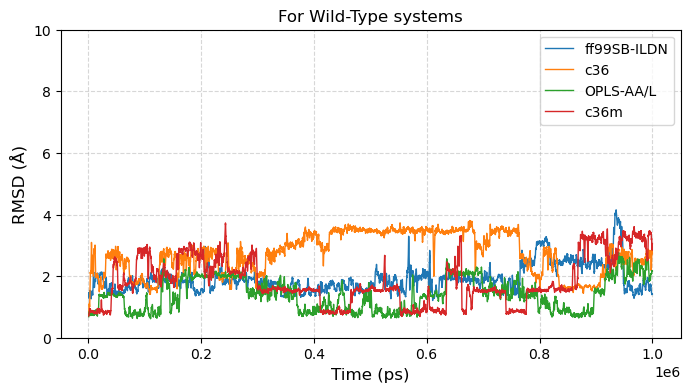

In [26]:
plt.figure(figsize=(8, 4))

# Plotting the lines
lines = plt.plot(df_wt_avg[['ch_wam', 'ch_wch', 'ch_wop', 'ch_wc36']], linewidth=1.0)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('RMSD (Å)', fontsize=12)
plt.ylim(0, 10)
plt.title('For Wild-Type systems')

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=10)

# Saving and showing plot
plt.savefig('rmsd_chwt.png', dpi=300)
plt.show()


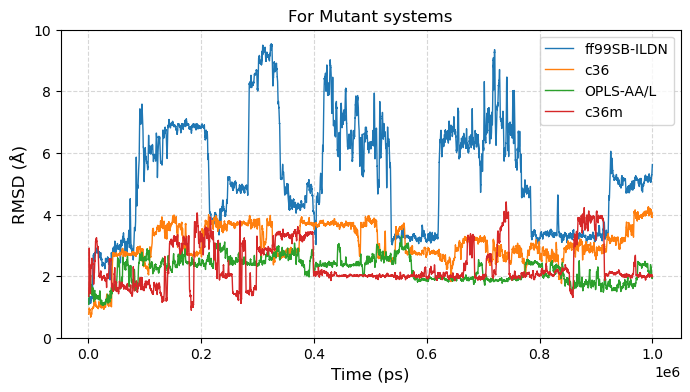

In [27]:
plt.figure(figsize=(8, 4))

# Plotting the lines
lines = plt.plot(df_mt_avg[['ch_mam', 'ch_mch', 'ch_mop', 'ch_mc36']], linewidth=1.0)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('RMSD (Å)', fontsize=12)
plt.ylim(0, 10)
plt.title('For Mutant systems')

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=10)

# Saving and showing plot
plt.savefig('rmsd_chmt.png', dpi=300)
plt.show()

In [28]:
df_wt_avg.head()

,cs_wam,cp_wam,ch_wam,ch1_wam,ch2_wam,ch3_wam,cs_wch,cp_wch,ch_wch,ch1_wch,...,ch_wop,ch1_wop,ch2_wop,ch3_wop,cs_wc36,cp_wc36,ch_wc36,ch1_wc36,ch2_wc36,ch3_wc36
Time (ps),,,,,,,,,,,,,,,,,,,,,
990,1.424060,1.424060,1.288872,1.643151,0.859701,1.170236,0.842658,0.842658,0.783156,1.034610,...,0.683319,0.885011,0.472099,0.523224,0.720366,0.720366,0.708311,0.819068,0.637325,0.559662
1000,1.440516,1.440516,1.304720,1.662015,0.872757,1.184624,0.852368,0.852368,0.792420,1.047823,...,0.690095,0.892336,0.477566,0.531039,0.726636,0.726636,0.714347,0.826107,0.642695,0.564793
1010,1.451508,1.451508,1.314419,1.674684,0.877164,1.195453,0.857734,0.857734,0.798040,1.056419,...,0.692567,0.896190,0.477121,0.534261,0.730694,0.730694,0.717737,0.827261,0.648880,0.567785
1020,1.458652,1.458652,1.322355,1.684867,0.880074,1.206001,0.859189,0.859189,0.798719,1.057302,...,0.696680,0.904752,0.476970,0.534691,0.732390,0.732390,0.719338,0.828826,0.651228,0.568347
1030,1.470166,1.470166,1.334125,1.700491,0.886786,1.218131,0.862060,0.862060,0.801759,1.062882,...,0.698706,0.911713,0.474917,0.533402,0.735029,0.735029,0.721610,0.832322,0.653861,0.567671


In [29]:
df_mt_avg.head()

,cs_mam,cp_mam,ch_mam,ch1_mam,ch2_mam,ch3_mam,cs_mch,cp_mch,ch_mch,ch1_mch,...,ch_mop,ch1_mop,ch2_mop,ch3_mop,cs_mc36,cp_mc36,ch_mc36,ch1_mc36,ch2_mc36,ch3_mc36
Time (ps),,,,,,,,,,,,,,,,,,,,,
990,1.145108,1.145108,1.110532,1.222323,1.101077,0.834272,0.950150,0.950150,0.761429,0.838119,...,1.085461,1.114323,0.781646,1.412598,1.238195,1.238195,1.343727,1.892351,0.718660,0.864850
1000,1.159672,1.159672,1.124455,1.237022,1.116631,0.842336,0.962095,0.962095,0.771726,0.851299,...,1.098289,1.128012,0.790857,1.428994,1.259586,1.259586,1.368092,1.928938,0.729365,0.875147
1010,1.166184,1.166184,1.130855,1.243883,1.124071,0.845512,0.966957,0.966956,0.774514,0.856282,...,1.105654,1.134690,0.796072,1.441546,1.276135,1.276135,1.387670,1.960828,0.734599,0.881671
1020,1.170522,1.170522,1.135615,1.249344,1.130162,0.845642,0.971267,0.971266,0.775975,0.859871,...,1.113069,1.143237,0.799411,1.453187,1.292385,1.292385,1.406222,1.988954,0.742089,0.891497
1030,1.177562,1.177562,1.142257,1.255654,1.138096,0.851695,0.970185,0.970185,0.774152,0.863405,...,1.120974,1.151764,0.804790,1.464039,1.305185,1.305185,1.421908,2.015355,0.746423,0.896080


In [30]:
wt_col = df_wt_avg[['ch_wam', 'ch_wch', 'ch_wop', 'ch_wc36']]

mt_col = df_mt_avg[['ch_mam', 'ch_mch', 'ch_mop', 'ch_mc36']]

df_ch = pd.concat([wt_col, mt_col], axis=1)
df_ch.head()

,ch_wam,ch_wch,ch_wop,ch_wc36,ch_mam,ch_mch,ch_mop,ch_mc36
Time (ps),,,,,,,,
990,1.288872,0.783156,0.683319,0.708311,1.110532,0.761429,1.085461,1.343727
1000,1.304720,0.792420,0.690095,0.714347,1.124455,0.771726,1.098289,1.368092
1010,1.314419,0.798040,0.692567,0.717737,1.130855,0.774514,1.105654,1.387670
1020,1.322355,0.798719,0.696680,0.719338,1.135615,0.775975,1.113069,1.406222
1030,1.334125,0.801759,0.698706,0.721610,1.142257,0.774152,1.120974,1.421908


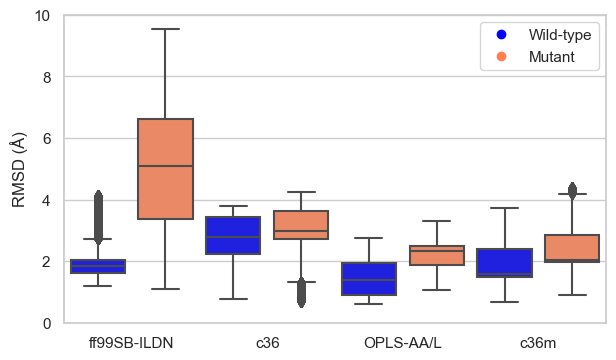

In [31]:
plt.figure(figsize=(7, 4))
sns.set_theme(style="whitegrid")
palette = {'ch_wam': 'blue', 'ch_wch': 'blue', 'ch_wop': 'blue', 'ch_wc36': 'blue',
           'ch_mam': 'coral', 'ch_mch': 'coral', 'ch_mop': 'coral', 'ch_mc36': 'coral'}
# Boxplot
sns.boxplot(data=df_ch[['ch_wam', 'ch_mam', 'ch_wch', 'ch_mch', 'ch_wop', 'ch_mop', 'ch_wc36', 'ch_mc36']], palette=palette)
plt.xticks([0.5, 2.5, 4.5, 6.5], ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m'])
plt.ylim(0,10)

plt.ylabel('RMSD (Å)')

# Create custom legend labels
legend_labels = {'Wild-type': 'blue', 'Mutant': 'coral'}
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in legend_labels.items()]

# Add legend
plt.legend(handles=custom_legend)

plt.savefig('rmsd_boxplot.png', dpi=300)
plt.show()

#### NOT OF RUNNING AVG

In [32]:
wt_cols = df_wt[['ch_wam', 'ch_wch', 'ch_wop', 'ch_wc36']]

mt_cols = df_mt[['ch_mam', 'ch_mch', 'ch_mop', 'ch_mc36']]

df_ = pd.concat([wt_cols, mt_cols], axis=1)
df_.head()

,ch_wam,ch_wch,ch_wop,ch_wc36,ch_mam,ch_mch,ch_mop,ch_mc36
Time (ps),,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.710115,0.474090,0.497763,0.536089,0.726140,0.472022,0.559264,0.634413
20,0.849489,0.555731,0.506291,0.575182,0.852661,0.673793,0.613920,0.773363
30,0.712804,0.726061,0.610992,0.433794,0.734676,0.946917,0.604517,0.662190
40,0.758650,0.707045,0.488986,0.655331,0.628325,1.083877,0.733351,0.746306


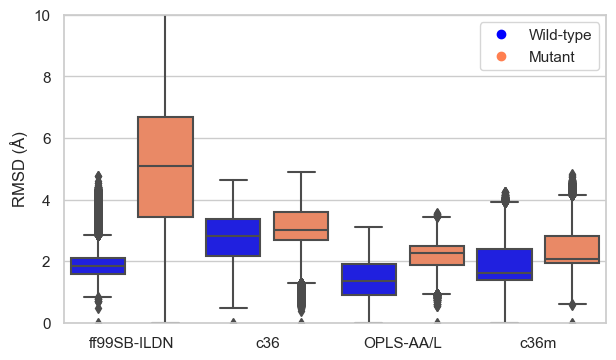

In [33]:
plt.figure(figsize=(7, 4))
sns.set_theme(style="whitegrid")
palette = {'ch_wam': 'blue', 'ch_wch': 'blue', 'ch_wop': 'blue', 'ch_wc36': 'blue',
           'ch_mam': 'coral', 'ch_mch': 'coral', 'ch_mop': 'coral', 'ch_mc36': 'coral'}
# Boxplot
sns.boxplot(data=df_[['ch_wam', 'ch_mam', 'ch_wch', 'ch_mch', 'ch_wop', 'ch_mop', 'ch_wc36', 'ch_mc36']], palette=palette)
plt.xticks([0.5, 2.5, 4.5, 6.5], ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m'])
plt.ylim(0,10)

plt.ylabel('RMSD (Å)')

# Create custom legend labels
legend_labels = {'Wild-type': 'blue', 'Mutant': 'coral'}
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in legend_labels.items()]

# Add legend
plt.legend(handles=custom_legend)

plt.savefig('rmsd_boxplot_NAVG.png', dpi=300)
plt.show()